In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# init parameters
m = 10000
d = 2000
beta = 2

iterations = 100*d

In [3]:
losses = []

def mse(X, y, theta): 
    return ((y - X @ theta) ** 2).sum()

def generate_data(m, d): 
    X = np.random.normal(0, 1, (m, d))
    theta_true = np.random.randint(2, size=d)
    y = X @ theta_true

    return X, y, theta_true

def get_samples(iterations, beta, m, d ):

    X, y, theta_true = generate_data(m, d)

    theta = np.random.randint(2, size=d) # initialize theta randomly with 0 and 1s

    for _ in range(iterations): 
        pos = np.random.randint(0, d) 
        theta1 = theta.copy()
        theta1[pos] = not theta[pos]  # get new theta with only one digit changed

        comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1

        # compute loss
        mse_val = mse(X, y, theta) 
        losses.append(mse_val)

        return losses


In [13]:
(np.array([1,2,3]) ** 2).mean()

4.666666666666667

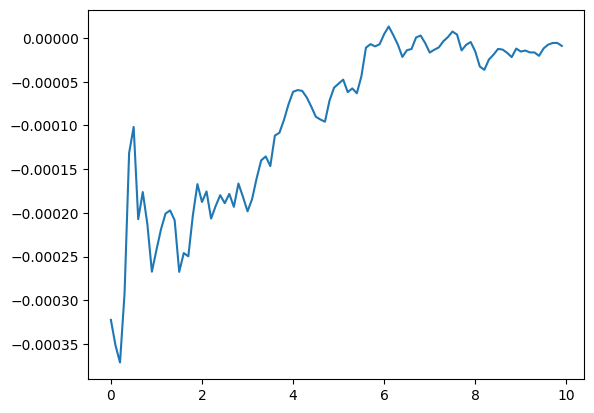

In [4]:
# TODO: implement simulation annealing

# iterating over different values of beta
losses_b = []
betas =  np.arange(0, 10, 0.1)


for beta_value in betas: 
    losses_b.append(np.mean(get_samples(iterations, beta_value, m, d)))

plt.plot(betas, losses_b) # always changes

/tmp/ipykernel_26821/1087743990.py:17: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta *(2 * y.T @ (X @ (theta - theta1))  + (X @ theta) @ (X @ theta).T - (X @ theta1) @ (X @ theta1).T))[0]


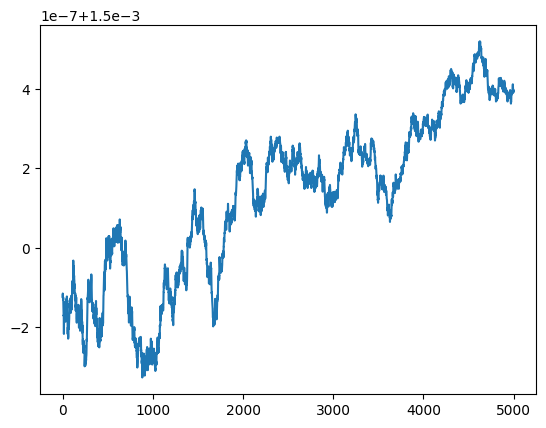

In [224]:

losses_m = []

m_values = list(range(5000))
for m_value in m_values: 
    losses_m.append(np.mean(get_samples(iterations, beta, m_value, d)))

plt.plot(m_values, losses_m) # always changes
